In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data_path='data/IRIS.csv'
df=pd.read_csv(data_path)

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [12]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [13]:
num_cols=df.select_dtypes(include=['int','float'])
num_cols

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


<Axes: title={'center': 'Comparison between various species based on sapel length and width'}, xlabel='sepal_length', ylabel='sepal_width'>

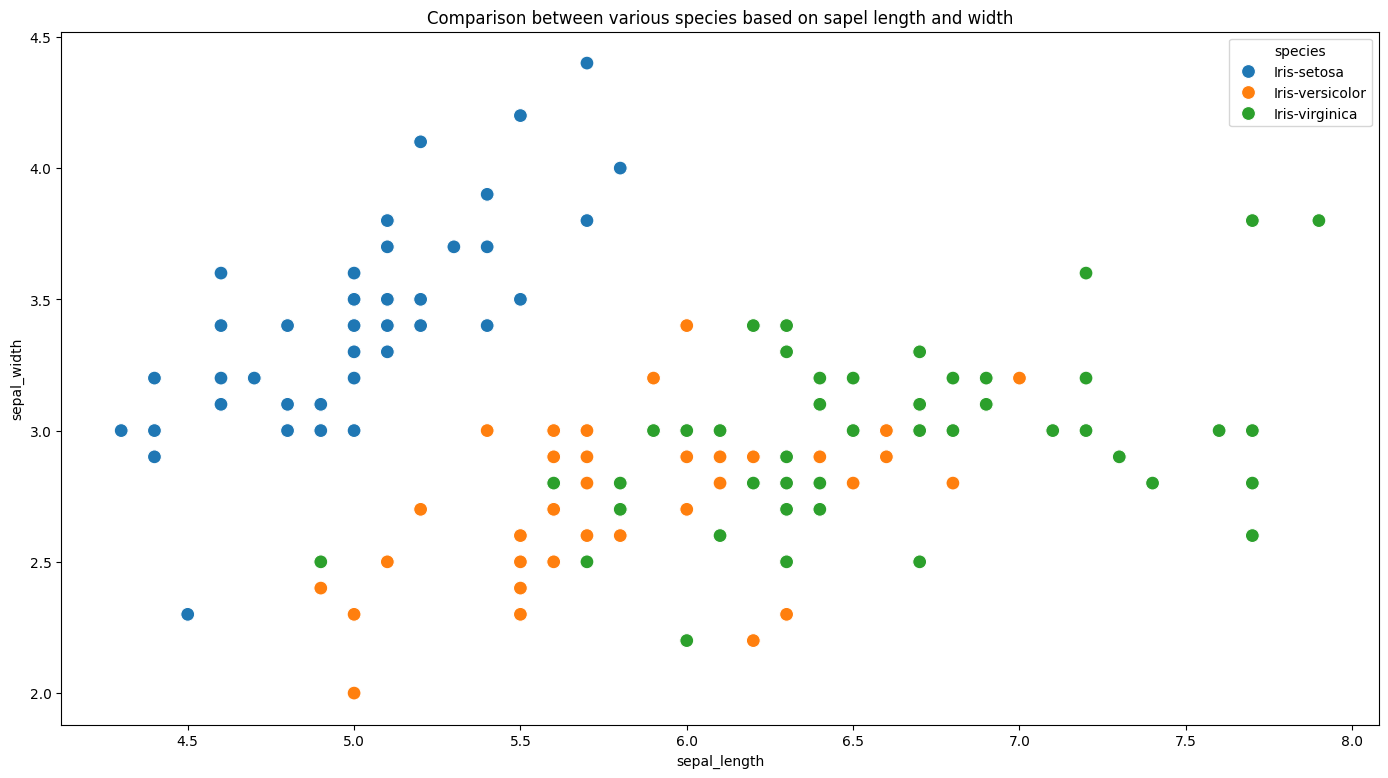

In [28]:
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(data=df,
                x='sepal_length',
                y='sepal_width',
                hue='species',
                s=100)

<Axes: title={'center': 'Comparison between various species based on sapel length and width'}, xlabel='petal_length', ylabel='petal_width'>

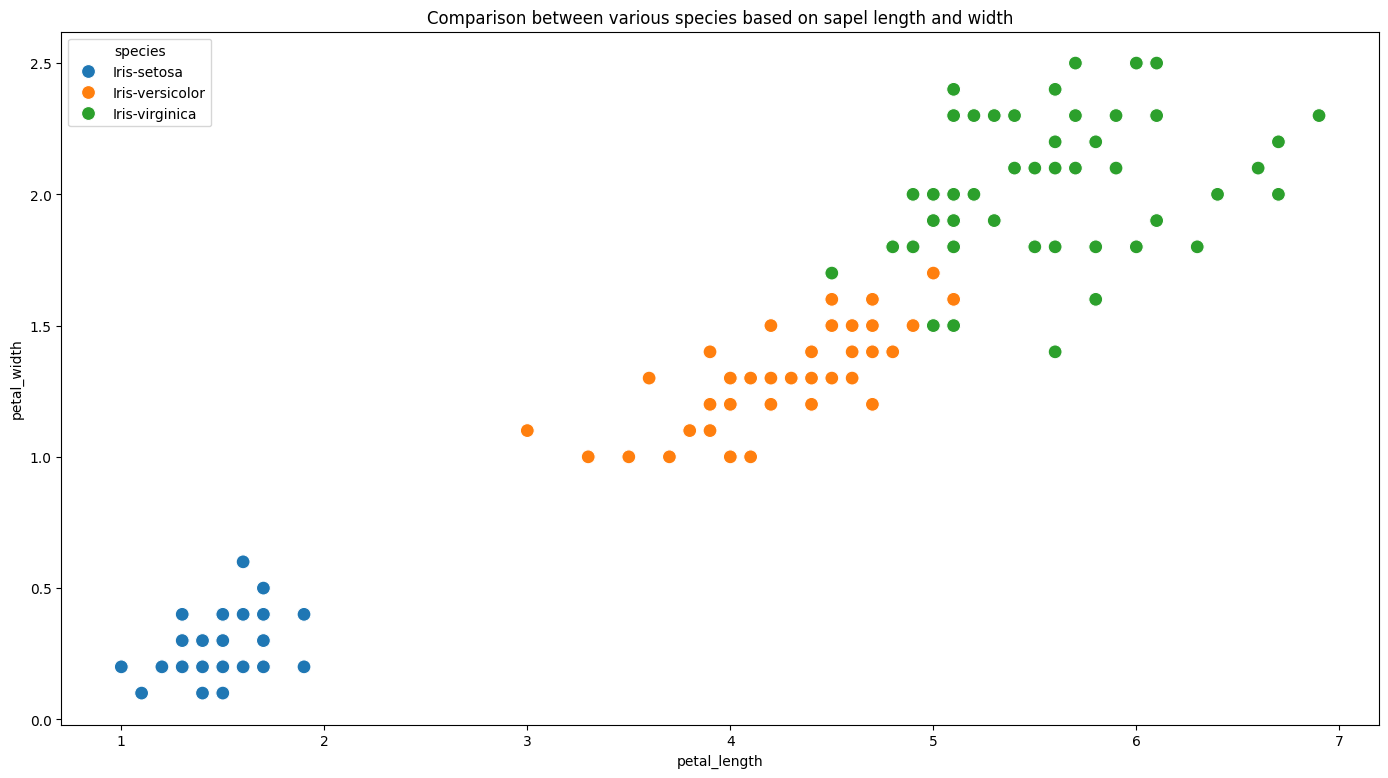

In [29]:
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(data=df,
                x='petal_length',
                y='petal_width',
                hue='species',
                s=100)

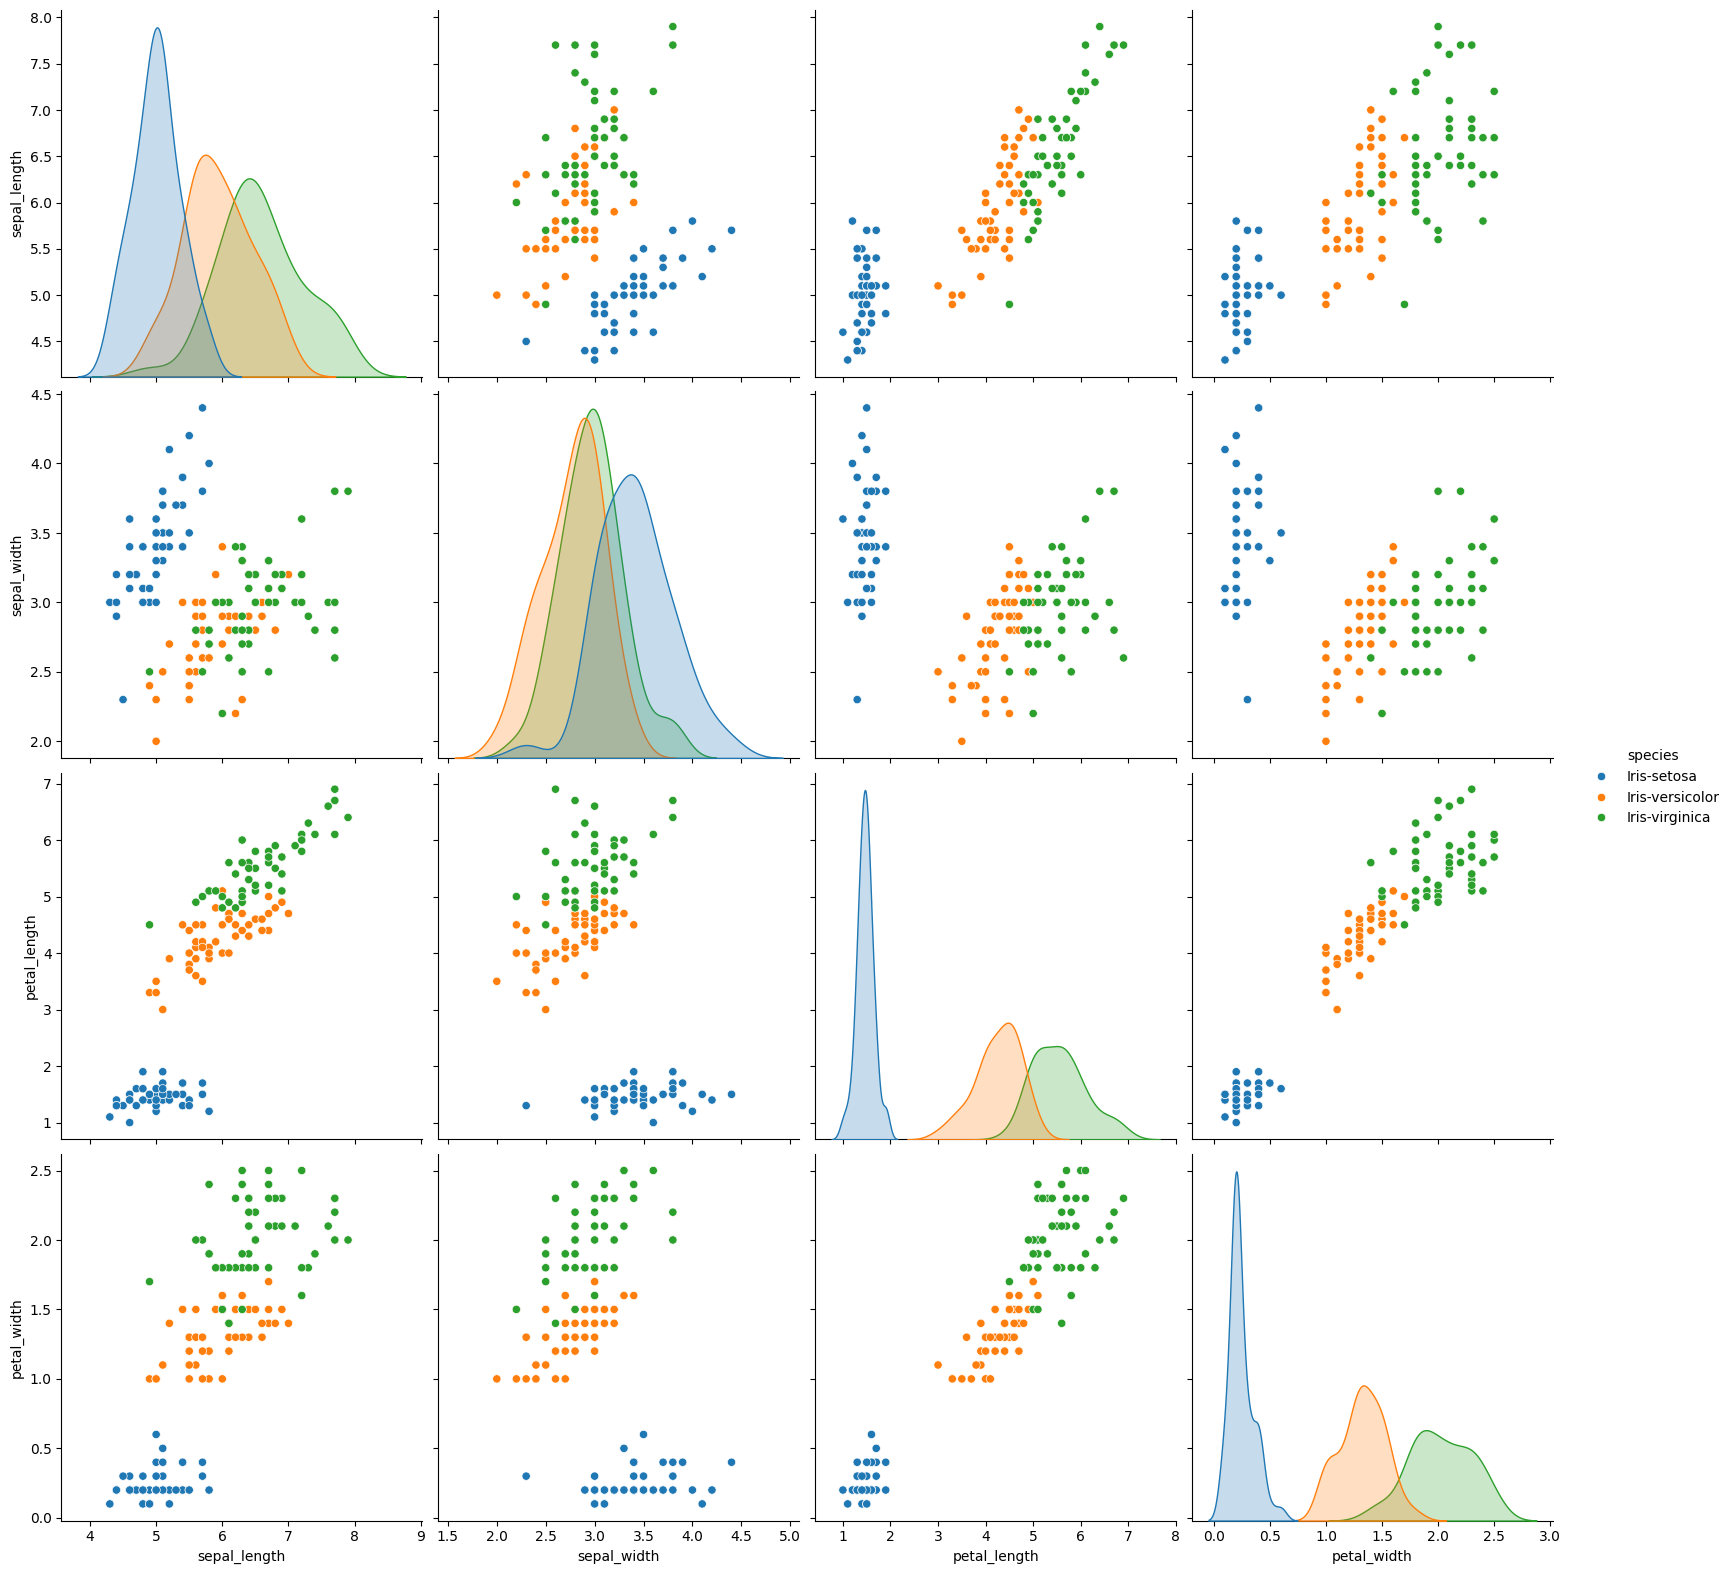

In [31]:
sns.pairplot(df,hue='species',height=4)

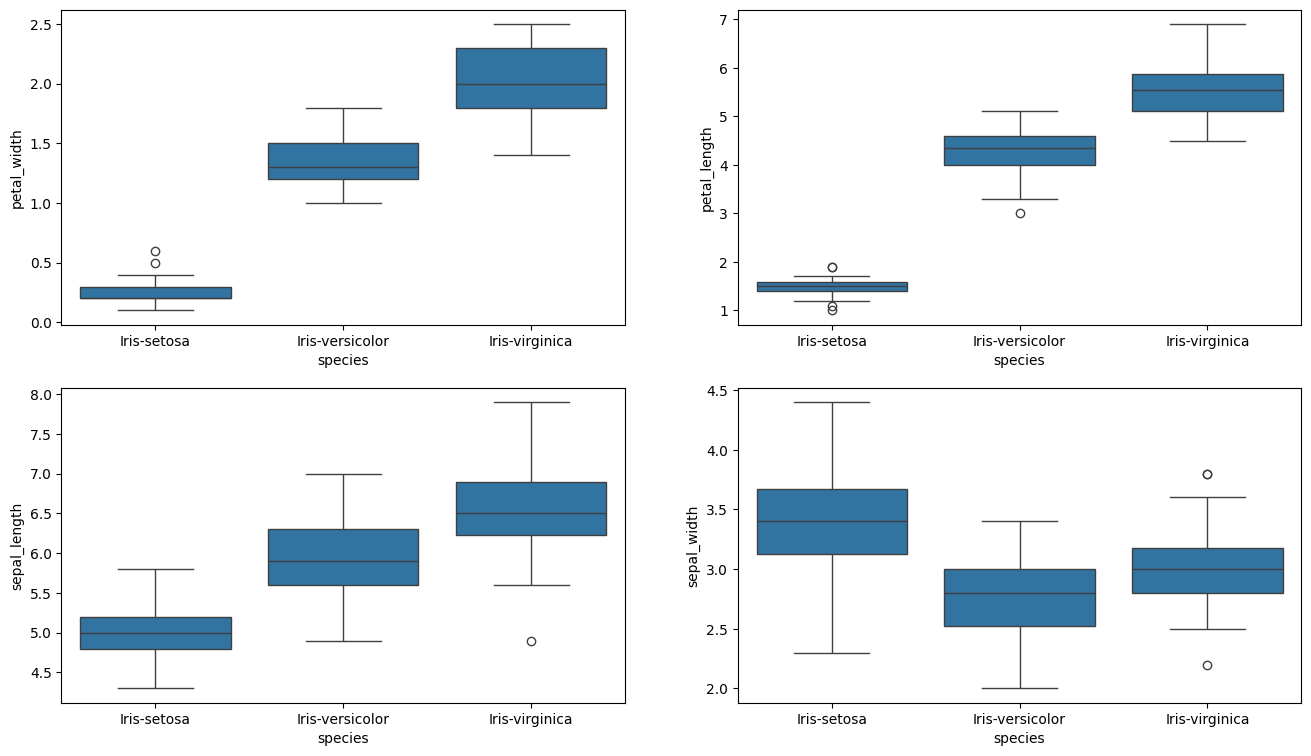

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=df['petal_width'], x= df['species'], data=df, orient="v" , ax=axes[0, 0])
sns.boxplot( y=df['petal_length'], x= df['species'], data=df, orient="v" , ax=axes[0, 1])
sns.boxplot( y=df['sepal_length'], x= df['species'], data=df, orient="v" , ax=axes[1, 0])
sns.boxplot( y=df['sepal_width'], x= df['species'], data=df, orient="v" , ax=axes[1, 1])
plt.show()

In [38]:
target=df['species']
print(target)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



def prcoess_traning(df,target='species'):
    X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    y = df['species']

    le = LabelEncoder()
    y_enc = le.fit_transform(y)


    X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

    svm_model = SVC(probability=True)
    svm_model.fit(X_train, y_train)
    svm_preds = svm_model.predict(X_test)

    print("SVM accuracy:", accuracy_score(y_test, svm_preds))
    print(confusion_matrix(y_test, svm_preds))

    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)

    print("KNN accuracy:", accuracy_score(y_test, knn_preds))
    print(confusion_matrix(y_test, knn_preds))


prcoess_traning(df)



SVM accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
KNN accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
